## Parte 1 - Pima Indians Diabetes

#### 1.1 Carregamento do conjunto de dados

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

pima_df = pd.read_csv('diabetes.csv')
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 1.2 Exploração inicial dos dados

In [3]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 1.3 Análise univariada

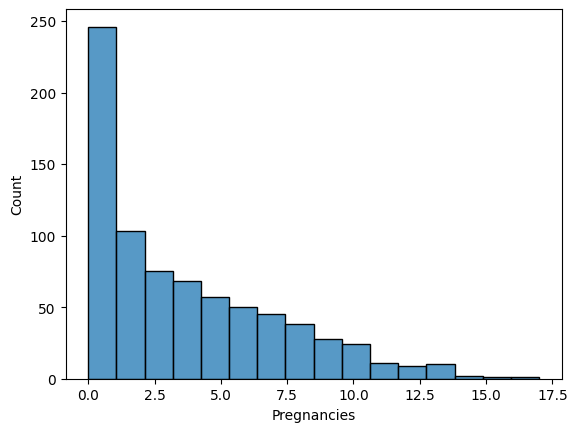

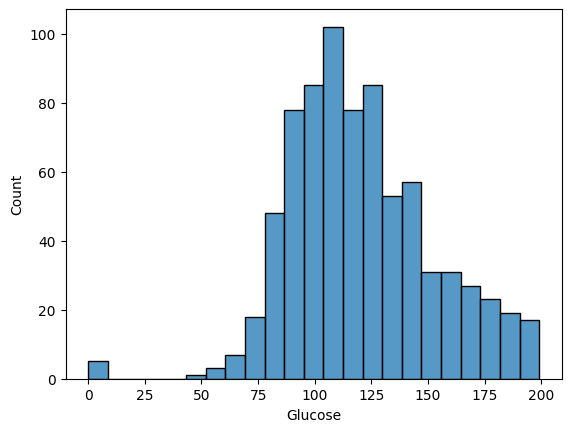

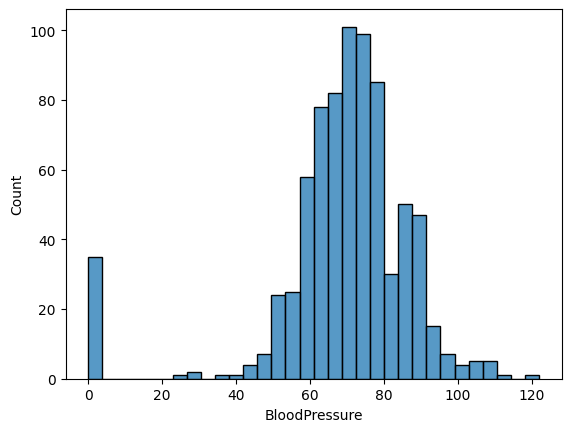

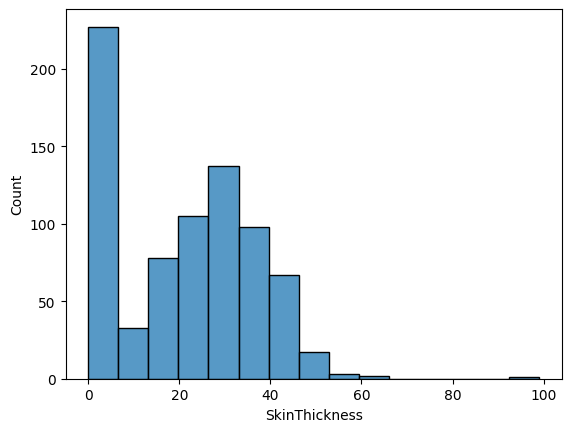

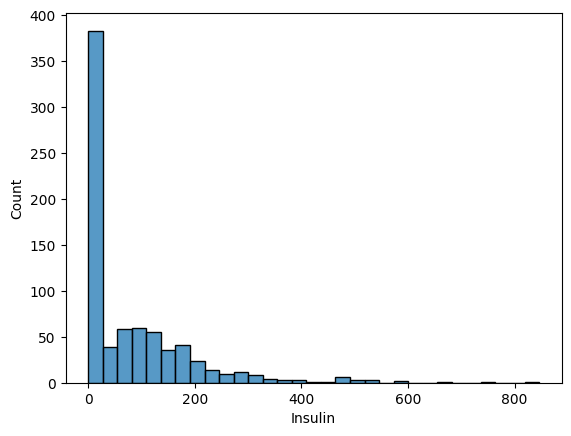

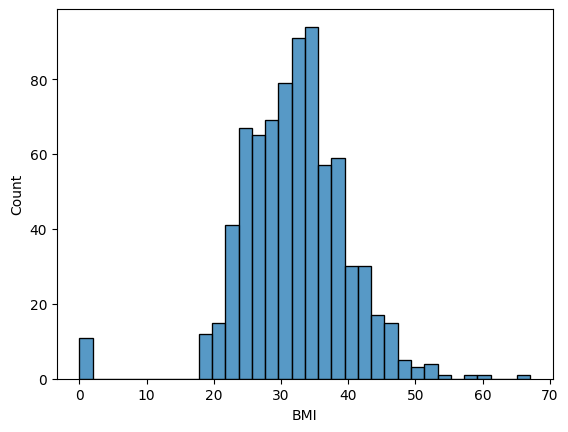

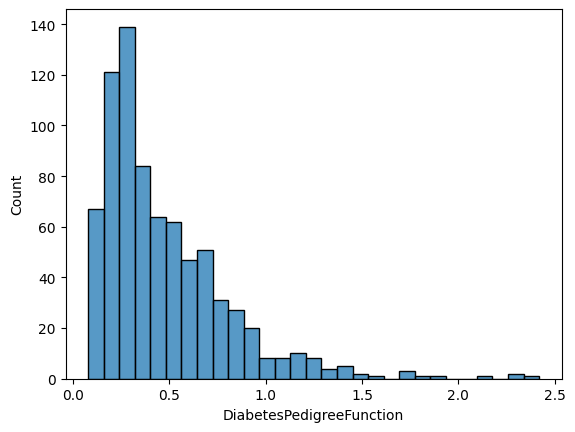

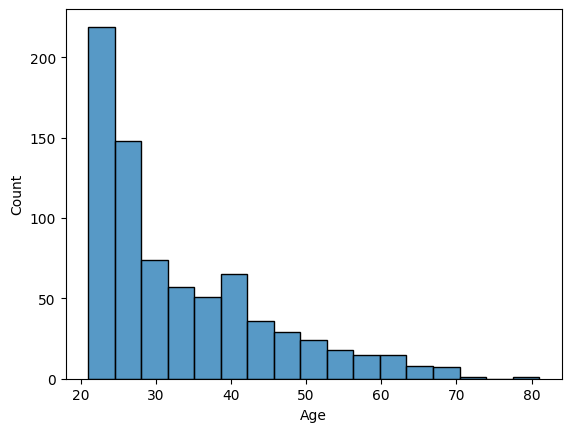

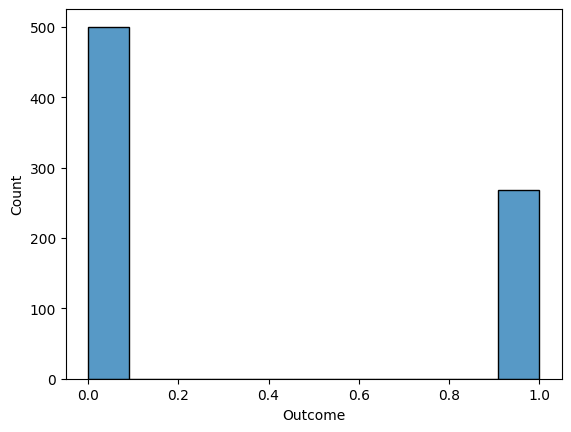

In [15]:
# Distribuição das Variáveis:
numeric_variables = pima_df.select_dtypes(include=[np.number])

for var in numeric_variables:
    sns.histplot(pima_df[var])
    plt.show()

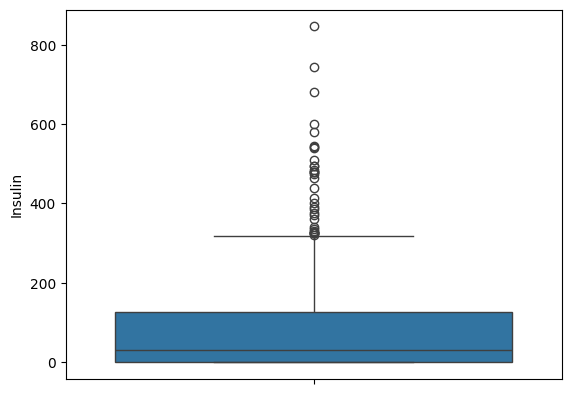

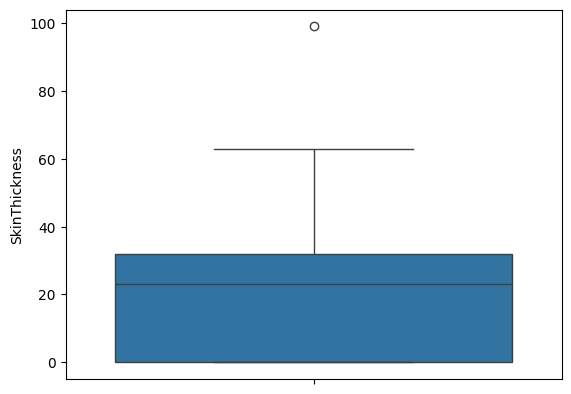

In [17]:
# Análise de Outliers:
outliers_analisys = pima_df[['Insulin', 'SkinThickness']]

for column in outliers_analisys:
    sns.boxplot(y=pima_df[column])
    plt.show()

#### 1.4 Análise bivariada

<Axes: >

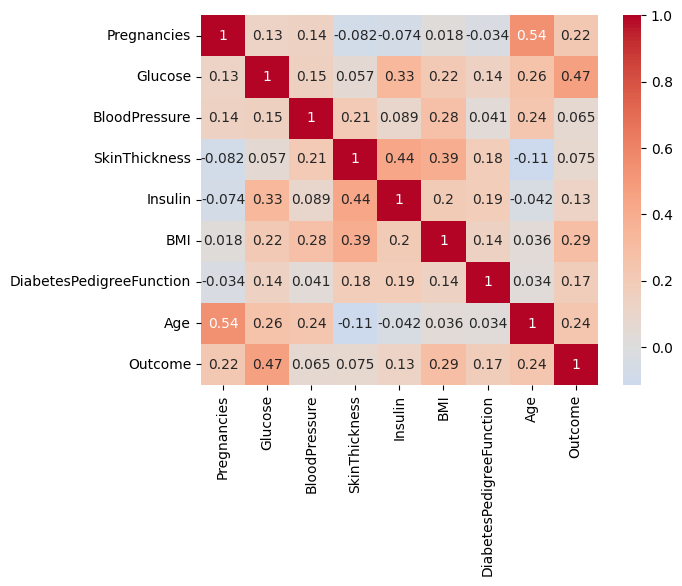

In [32]:
# Correlação entre variáveis:
correlation_matrix_df = pima_df.corr()
sns.heatmap(correlation_matrix_df, annot=True, cmap='coolwarm', center=0)

In [ ]:
# Gráficos de Dispersão: